In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
# we need to decode the animal column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['animal name'] = le.fit_transform(df['animal name'])
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(['animal name', 'type'], axis=1)  # Features excluding the target column
y = df['type']  # Target is 'type'
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)



In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with a specified number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8709677419354839
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.87        31
   macro avg       0.76      0.73      0.72        31
weighted avg       0.91      0.87      0.87        31



C:\Users\hp\AppData\Local\Temp\ipykernel_27432\2121571594.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


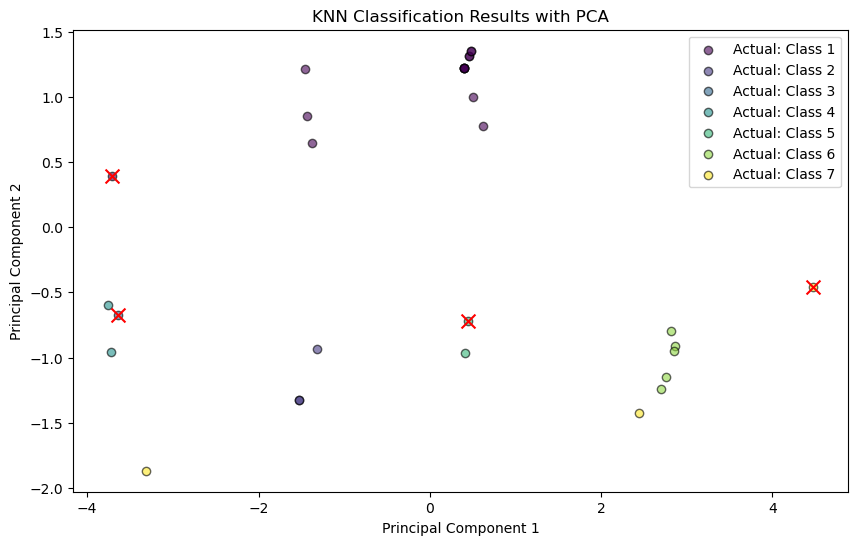

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming you've already trained your KNN model and have predictions
y_pred = knn.predict(X_test)  # Predict on the test set

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# Create a color map for plotting
unique_classes = np.unique(y_test)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_classes)))

# Plotting the actual vs. predicted classes
plt.figure(figsize=(10, 6))

# Plot the actual classes
for i, target in enumerate(unique_classes):
    plt.scatter(
        X_test_2d[y_test == target, 0], 
        X_test_2d[y_test == target, 1], 
        color=colors[i],
        label=f'Actual: Class {target}',
        edgecolor='k',
        alpha=0.6
    )

# Highlight misclassified points
for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred[i]:
        plt.scatter(
            X_test_2d[i, 0], X_test_2d[i, 1], 
            color='red', 
            edgecolor='k',
            marker='x', 
            s=100, 
            label='Misclassified' if i == 0 else ""
        )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("KNN Classification Results with PCA")
plt.show()


# Interview Question

# 1. What are the key hyperparameters in KNN?



In [ ]:
# The number of nearest neighbors considered to classify a new data point or predict a value.
#  Small K is Sensitive to noise and overfitting (low bias, high variance).
# Large K Smoother decision boundaries but may lead to underfitting (high bias, low variance).

# Distance Metric :- Euclidean: Suitable for continuous features.
# Manhattan: Useful for high-dimensional or sparse data.

# Weight Function :- Distance-based: Closer neighbors are weighted more heavily.


# 2. What distance metrics can be used in KNN?

In [ ]:
# 1 Euclidean Distance
#Straight-line distance in Euclidean space. Best for continuous and numeric features
# 2 Manhattan Distance
# Distance measured along axes at right angles. Useful when features are not equally scaled or sparse.